In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import src.data_loader as data_loader
import numpy as np


# parse data
trade_data = pd.read_csv("out/trade_data.csv")
portfolio_data = pd.read_csv("out/portfolio_data.csv")
equity_curve = pd.read_csv("out/equity_curve.csv")
periodic_returns = pd.read_csv("out/periodic_returns.csv")
prices = [p.price for p in data_loader.load_market_data("data/market_data.csv")]


df = pd.DataFrame(
    {
        "prices": prices,
        "equity_curve": equity_curve.to_numpy().flatten(),
        "periodic_returns": ([0] + periodic_returns.to_numpy().flatten().tolist()),
    }
)

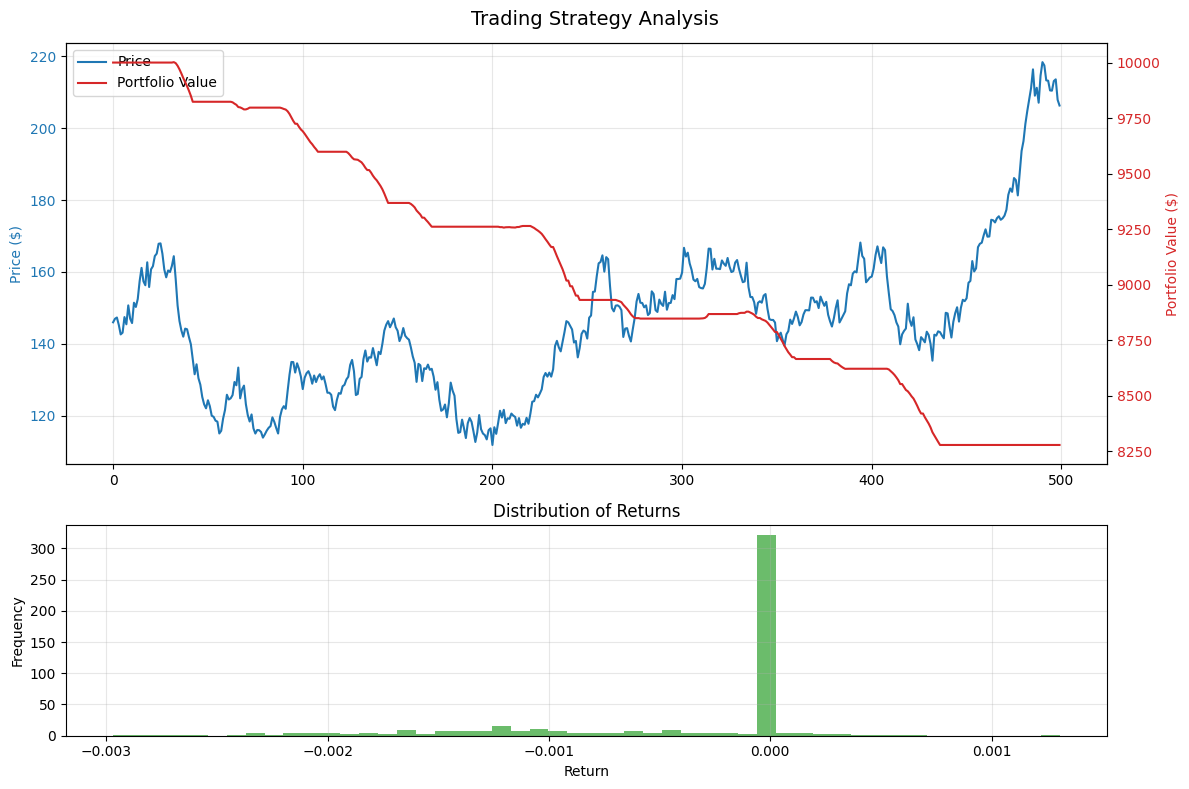

In [64]:
# Create figure with subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), height_ratios=[2, 1])
fig.suptitle("Trading Strategy Analysis", fontsize=14)

# Top plot with price and equity curve
price_ax = ax1
equity_ax = ax1.twinx()

# Plot price data
price_line = price_ax.plot(df["prices"], color="#1f77b4", label="Price", linewidth=1.5)
price_ax.set_ylabel("Price ($)", color="#1f77b4")
price_ax.tick_params(axis="y", labelcolor="#1f77b4")
price_ax.grid(True, alpha=0.3)

# Plot equity curve
equity_line = equity_ax.plot(
    df["equity_curve"], color="#d62728", label="Portfolio Value", linewidth=1.5
)
equity_ax.set_ylabel("Portfolio Value ($)", color="#d62728")
equity_ax.tick_params(axis="y", labelcolor="#d62728")

# Combine legends
lines = price_line + equity_line
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc="upper left")

# Bottom plot with return distribution
ax2.hist(df["periodic_returns"], bins=50, color="#2ca02c", alpha=0.7)
ax2.set_title("Distribution of Returns")
ax2.set_xlabel("Return")
ax2.set_ylabel("Frequency")
ax2.grid(True, alpha=0.3)

# Adjust layout and display
plt.tight_layout()
plt.show()

In [82]:
returns = equity_curve.pct_change()
mean_ret = returns.mean()
std_ret = returns.std()
sharpe = ((mean_ret - (0.04 / 252)) / std_ret) * np.sqrt(252)
equities = equity_curve["equity"].to_numpy()
max_drawdown = min(
    [
        [equities[i] - equities[j]] / equities[j]
        for i in range(len(equities))
        for j in range(i)
    ]
)

total_return = (equities[-1] - equities[0]) / equities[0]

df = pd.DataFrame(
    {
        "total_return": total_return,
        "mean_ret": mean_ret,
        "std_ret": std_ret,
        "sharpe": sharpe,
        "max_drawdown": max_drawdown,
    }
)
df.head()

,total_return,mean_ret,std_ret,sharpe,max_drawdown
equity,-0.172264,-0.000379,0.000684,-12.467381,-0.172421
